In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
df = pd.read_csv('telcom_data.csv')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [3]:
df.columns = [col.strip().replace(' ', '_').replace('.', '') for col in df.columns]

In [4]:
print(df.columns)

Index(['Bearer_Id', 'Start', 'Start_ms', 'End', 'End_ms', 'Dur_(ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last_Location_Name', 'Avg_RTT_DL_(ms)',
       'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)',
       'TCP_DL_Retrans_Vol_(Bytes)', 'TCP_UL_Retrans_Vol_(Bytes)',
       'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
       '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)',
       'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)',
       'HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur_(ms)1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_125000B_<_Vol_DL',
       'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
       'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
       'Nb_of_sec_with_37500B_<_Vol_UL',
       'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
       'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
     

# ---------------------- Task 1: User Overview ----------------------

In [5]:
top_10_handsets = df['Handset_Type'].value_counts().head(10)
print("Top 10 Handsets:\n", top_10_handsets)

Top 10 Handsets:
 Handset_Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [6]:
# Top 3 handset manufacturers
top_3_manufacturers = df['Handset_Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:\n", top_3_manufacturers)

Top 3 Handset Manufacturers:
 Handset_Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [7]:
# Top 5 handsets per top 3 manufacturer
print("\nTop 5 Handsets Per Top 3 Manufacturer:")
for mfr in top_3_manufacturers.index:
    top_5 = df[df['Handset_Manufacturer'] == mfr]['Handset_Type'].value_counts().head(5)
    print(f"\n{mfr}:\n{top_5}")


Top 5 Handsets Per Top 3 Manufacturer:

Apple:
Handset_Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset_Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset_Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


# ---------------------- Task 1.1: Aggregate per user ----------------------

In [8]:
print(df.columns)

Index(['Bearer_Id', 'Start', 'Start_ms', 'End', 'End_ms', 'Dur_(ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last_Location_Name', 'Avg_RTT_DL_(ms)',
       'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)',
       'TCP_DL_Retrans_Vol_(Bytes)', 'TCP_UL_Retrans_Vol_(Bytes)',
       'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
       '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)',
       'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)',
       'HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur_(ms)1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_125000B_<_Vol_DL',
       'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
       'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
       'Nb_of_sec_with_37500B_<_Vol_UL',
       'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
       'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
     

In [9]:
# Define actual application columns (as per your dataset)
app_columns = {
    'Social Media': ['Social_Media_DL_(Bytes)', 'Social_Media_UL_(Bytes)'],
    'YouTube': ['Youtube_DL_(Bytes)', 'Youtube_UL_(Bytes)'],
    'Netflix': ['Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)'],
    'Google': ['Google_DL_(Bytes)', 'Google_UL_(Bytes)'],
    'Email': ['Email_DL_(Bytes)', 'Email_UL_(Bytes)'],
    'Gaming': ['Gaming_DL_(Bytes)', 'Gaming_UL_(Bytes)'],
    'Other': ['Other_DL_(Bytes)', 'Other_UL_(Bytes)']
}

# Base aggregation
agg_dict = {
    'Bearer_Id': 'count',
    'Dur_(ms)': 'sum',
    'Total_DL_(Bytes)': 'sum',
    'Total_UL_(Bytes)': 'sum',
}

# Add app columns to aggregation dictionary
for app, (dl_col, ul_col) in app_columns.items():
    agg_dict[dl_col] = 'sum'
    agg_dict[ul_col] = 'sum'

# Clean column names before aggregation (optional but recommended)
df.columns = df.columns.str.strip()

# Perform aggregation
agg_df = df.groupby('MSISDN/Number').agg(agg_dict).rename(columns={
    'Bearer_Id': 'num_sessions',
    'Dur_(ms)': 'total_duration',
    'Total_DL_(Bytes)': 'total_dl',
    'Total_UL_(Bytes)': 'total_ul'
})

# Combine DL and UL per app
for app, (dl_col, ul_col) in app_columns.items():
    agg_df[f"{app}_total_bytes"] = agg_df[dl_col] + agg_df[ul_col]
    agg_df.drop([dl_col, ul_col], axis=1, inplace=True)

# Show result
print("\n Aggregated user data sample:")
print(agg_df.head())


 Aggregated user data sample:
               num_sessions  total_duration      total_dl    total_ul  \
MSISDN/Number                                                           
3.360100e+10              1        116720.0  8.426375e+08  36053108.0   
3.360100e+10              1        181230.0  1.207552e+08  36104459.0   
3.360100e+10              1        134969.0  5.566597e+08  39306820.0   
3.360101e+10              1         49878.0  4.019932e+08  20327526.0   
3.360101e+10              2         37104.0  1.363130e+09  94280527.0   

               Social Media_total_bytes  YouTube_total_bytes  \
MSISDN/Number                                                  
3.360100e+10                  2232135.0           21624548.0   
3.360100e+10                  2660565.0           12432223.0   
3.360100e+10                  3195623.0           21333570.0   
3.360101e+10                   280294.0            6977321.0   
3.360101e+10                  2912542.0           41533002.0   

        

# ---------------------- Task 1.2: EDA ----------------------

In [10]:
# 1. Handle missing values
agg_df.fillna(agg_df.mean(numeric_only=True), inplace=True)

# 2. Data types
print("\nData Types:\n", agg_df.dtypes)

# 3. Basic metrics
print("\nDescriptive Statistics:\n", agg_df.describe())

# 4. Dispersion (Standard deviation)
print("\nStandard Deviation:\n", agg_df.std())


Data Types:
 num_sessions                  int64
total_duration              float64
total_dl                    float64
total_ul                    float64
Social Media_total_bytes    float64
YouTube_total_bytes         float64
Netflix_total_bytes         float64
Google_total_bytes          float64
Email_total_bytes           float64
Gaming_total_bytes          float64
Other_total_bytes           float64
dtype: object

Descriptive Statistics:
         num_sessions  total_duration      total_dl      total_ul  \
count  106856.000000    1.068560e+05  1.068560e+05  1.068560e+05   
mean        1.389777    1.461672e+05  6.336527e+08  5.730942e+07   
std         0.809863    1.863587e+05  4.645551e+08  3.565765e+07   
min         0.000000    7.142000e+03  8.827082e+06  2.866892e+06   
25%         1.000000    7.130800e+04  3.148271e+08  3.639547e+07   
50%         1.000000    1.027400e+05  5.703677e+08  4.679387e+07   
75%         2.000000    1.727990e+05  8.073645e+08  6.573199e+07   
max   

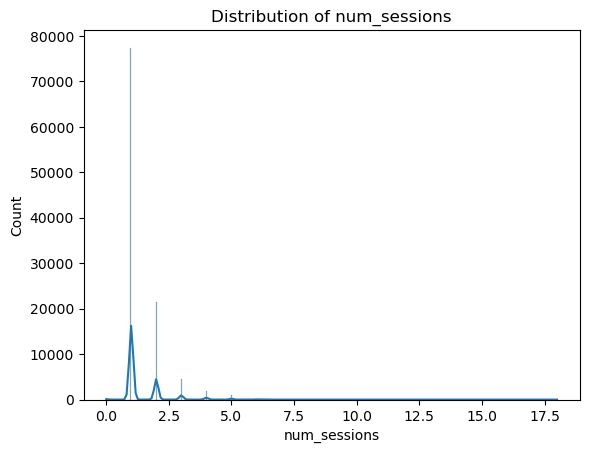

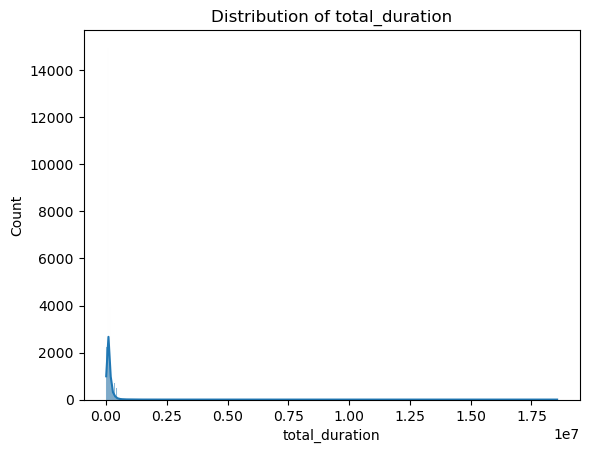

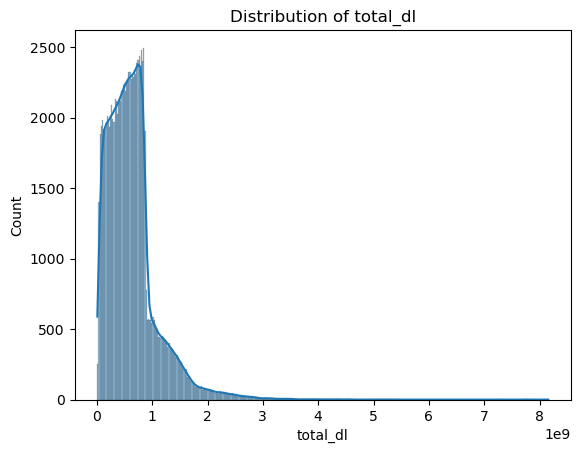

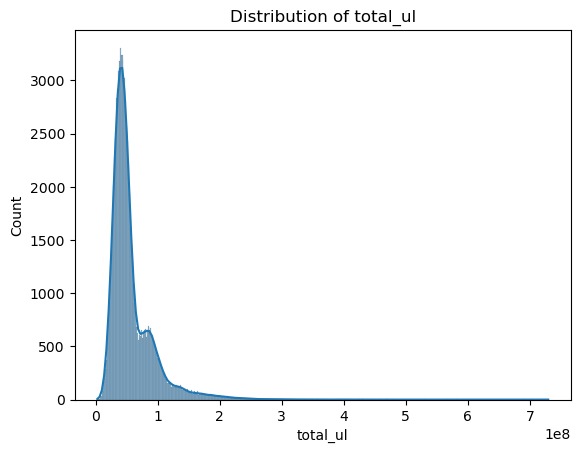

In [11]:
# 5. Graphical Univariate Analysis
for col in ['num_sessions', 'total_duration', 'total_dl', 'total_ul']:
    plt.figure()
    sns.histplot(agg_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"{col}_distribution.png")
    plt.show()

In [13]:
# 6. Bivariate Analysis: app usage vs total data
agg_df['total_data'] = agg_df['total_dl'] + agg_df['total_ul']
for app in app_columns.keys():
    corr = agg_df['total_data'].corr(agg_df[f'{app}_total_bytes'])
    print(f"Correlation between total data and {app}: {corr:.2f}")

Correlation between total data and Social Media: 0.62
Correlation between total data and YouTube: 0.71
Correlation between total data and Netflix: 0.71
Correlation between total data and Google: 0.68
Correlation between total data and Email: 0.66
Correlation between total data and Gaming: 1.00
Correlation between total data and Other: 0.62


In [14]:
# 7. Decile transformation by session duration
agg_df['duration_decile'] = pd.qcut(agg_df['total_duration'], 5, labels=False)
decile_usage = agg_df.groupby('duration_decile')['total_data'].sum()
print("\nTotal Data per Duration Decile:\n", decile_usage)



Total Data per Duration Decile:
 duration_decile
0    1.154869e+13
1    1.257064e+13
2    1.156998e+13
3    1.397471e+13
4    2.416942e+13
Name: total_data, dtype: float64


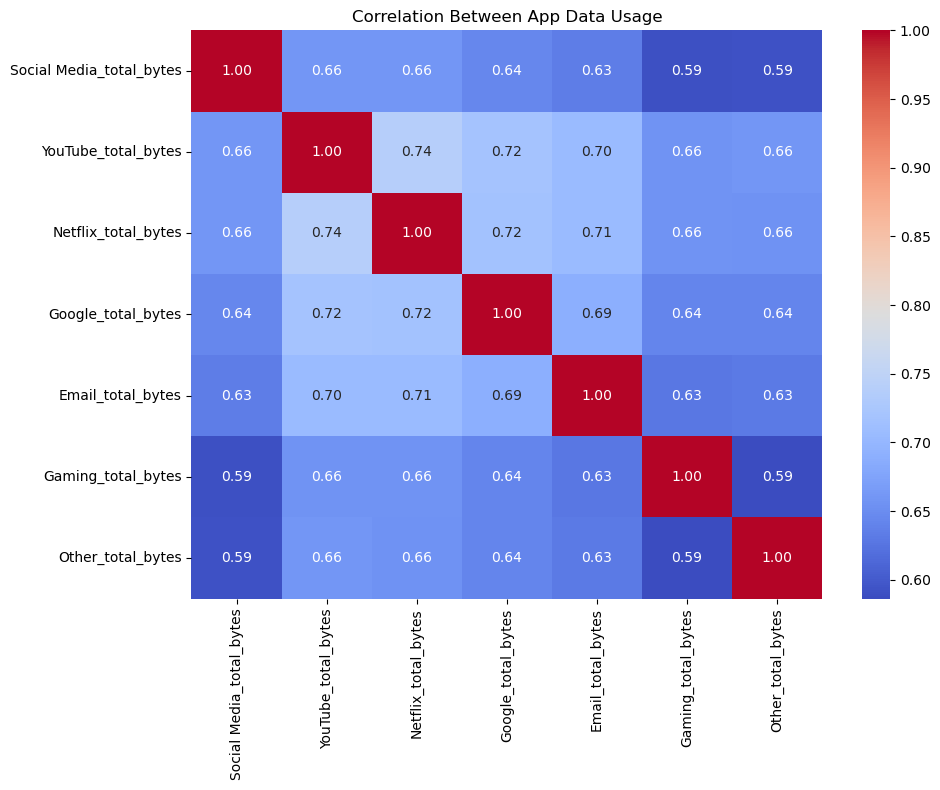

In [15]:
# 8. Correlation Matrix
app_cols = [f"{app}_total_bytes" for app in app_columns.keys()]
corr_matrix = agg_df[app_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between App Data Usage")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()

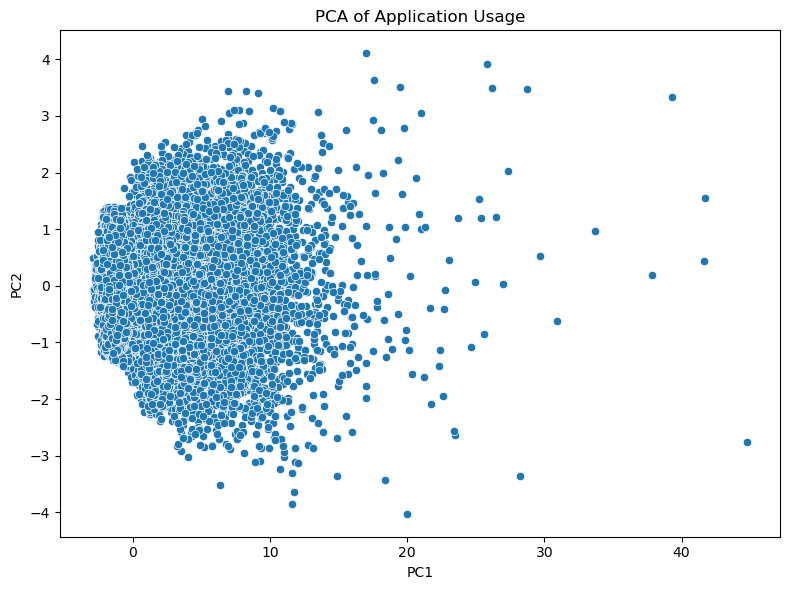

In [16]:
# 9. PCA - Dimensionality Reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df[app_cols])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA of Application Usage")
plt.tight_layout()
plt.savefig("pca_scatter.png")
plt.show()

In [17]:
import logging
import pandas as pd

logging.basicConfig(level=logging.INFO, format='%(levelname)s:%(message)s')

logging.info("Loading dataset...")
df = pd.read_csv('telcom_data.csv')

# Clean column names immediately after reading
df.columns = [col.strip().replace(' ', '_').replace('.', '') for col in df.columns]

# Now this will work
logging.info(f"Top 10 Handsets:\n{df['Handset_Type'].value_counts().head(10)}")


# Later after aggregation:
logging.info("Data aggregation done.")

# Before plotting or PCA:
logging.info("Generating plots and PCA...")

# And catch errors simply:
try:
    # your main code here
    pass
except Exception as e:
    logging.error(f"Error: {e}")


INFO:Loading dataset...
INFO:Top 10 Handsets:
Handset_Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64
INFO:Data aggregation done.
INFO:Generating plots and PCA...
